In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [2]:
train_ds=dataset.MNIST(root='/root',train=True,transform=transforms.ToTensor(),download=False)
test_ds=dataset.MNIST(root='/root',train=False,transform=transforms.ToTensor(),download=False)

In [3]:
batch_size=32

In [4]:
train_dl=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True,num_workers=2)
test_dl=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=True,num_workers=2)

In [5]:
image,target=next(iter(train_dl))

In [6]:
target

tensor([3, 0, 7, 8, 7, 7, 9, 3, 1, 0, 7, 2, 7, 6, 5, 2, 2, 0, 2, 6, 0, 0, 5, 8,
        0, 0, 7, 3, 5, 3, 6, 6])

In [7]:
image[0,0].shape

torch.Size([28, 28])

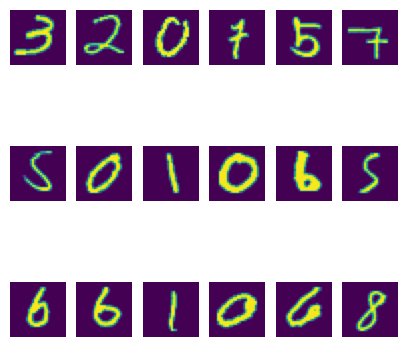

In [8]:
image,target=next(iter(train_dl))
plt.figure(figsize=(5,5))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(image[i,0])
    plt.axis('off')
plt.show() 

#MODEL

In [9]:
class SimpleNN(nn.Module):
    def __init__(self, num_feature, num_class):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=num_feature, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)  
        self.fc3 = nn.Linear(in_features=50, out_features=num_class) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out

In [10]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [11]:
model=SimpleNN(28*28,10).to(device)

In [12]:
model

SimpleNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

#loss Function

In [13]:
citertion=nn.CrossEntropyLoss()

#optimizer

In [14]:
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epoch=10
for i in range(epoch):
    SumLoss=0
    for idx,(data,target) in enumerate(train_dl):
        data=data.to(device)
        target=target.to(device)
        data=data.reshape(data.shape[0],-1)
        
        optimizer.zero_grad()
        
        score=model(data)
        
        loss=citertion(score,target)
        
        SumLoss+=loss
        
        loss.backward()
        
        optimizer.step()
        
              
    print(f"loss in epoch number {i+1} is equal to {SumLoss} ")   

loss in epoch number 1 is equal to 498.5939025878906 
loss in epoch number 2 is equal to 312.9569091796875 
loss in epoch number 3 is equal to 292.0363464355469 
loss in epoch number 4 is equal to 268.44635009765625 


In [ ]:
def checkAccuracy(dataLoader,model):
    
    if dataLoader.dataset.train :
        print('Accuracy on train data')
    else :
        print('accuracy on test data')
        
    num_correct=0
    num_sample=0
    
    model.eval()
    
    with torch.no_grad():
        for x,y in dataLoader:
            x=x.to(device)
            y=y.to(device)
            
            x=x.reshape(x.shape[0],-1)
            
            score=model(x)
            
            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_sample+=len(y)
            
        print(f"accuracy is equal to {num_correct/num_sample}")
        
    model.train()        

In [ ]:
checkAccuracy(train_dl,model)

In [ ]:
checkAccuracy(test_dl,model)